# 뗑컨 몸무게 예측 경진대회

## 패키지 import및 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [2]:
df = pd.read_csv('C:/Users/Jaesu/Dacon-Basic/뗑컨-몸무게-예측/Data/train.csv')

In [3]:
df.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


|변수   |세부사항   |
|:-:|:-:|
|id | 샘플 아이디|
|Species| 펭귄의 종을 나타내는 문자열|
|Island | 샘플들이 수집된 Palmer Station 근처 섬 이름|
|Clutch Completion | 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기|
|Culmen Length (mm) | 펭귄 옆모습 기준 부리의 가로 길이|
|Culmen Depth (mm) | 펭귄 옆모습 기준 부리의 세로 길이|
|Flipper Length (mm) |펭귄의 팔(날개) 길이|
|Sex | 펭귄의 성별|
|Delta 15 N (o/oo)  | 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율|
|Delta 13 C (o/oo) | 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율|
|Body Mass (g)| 펭귄의 몸무게를 나타내는 숫자 (g)|

`-` 범주형 변수 4개, 양적 변수 6개이다

In [4]:
df.describe().round(2)

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.00,114.00,114.00,114.00,111.00,111.00,114.00
mean,56.50,44.61,17.01,203.05,8.74,-25.72,4327.85
std,33.05,5.32,1.94,14.65,0.57,0.86,781.77
min,0.00,33.50,13.20,174.00,7.63,-27.02,2700.00
25%,28.25,40.33,15.22,190.00,8.27,-26.43,3675.00
50%,56.50,45.20,17.25,199.00,8.63,-25.96,4250.00
75%,84.75,49.08,18.60,216.00,9.26,-25.01,4850.00
max,113.00,55.10,21.10,231.00,10.03,-24.10,6300.00


In [5]:
df.shape ## 똉컨 114마리에 대한 10가지의 정보

(114, 11)

In [6]:
df.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

`-` Sex, Delta 15 N, Delta 13 C 컬럼에 결측치가 3개씩 존재한다

In [7]:
df.drop('id', axis = 1, inplace = True) ## id는 필요없으니 제거 

In [8]:
## 결측치가 있는 row들을 확인
df[df.isna().sum(axis = 1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [9]:
df.rename(columns = {'Clutch Completion':'Full_Clutch', 'Culmen Length (mm)':'Culmen_Length', 
                     'Culmen Depth (mm)':'Culmen_Depth', 'Flipper Length (mm)':'Flipper_Length',
                     'Delta 15 N (o/oo)':'DeltaN', 'Delta 13 C (o/oo)':'DeltaC', 'Body Mass (g)':'Body_Mass'}, inplace = True) ## 열 이름 변경

`-` 방사성 동위원소 행의 결측치에는 중앙값을 넣어주자

In [10]:
df['DeltaC'].fillna(df['DeltaC'].median(), inplace = True)
df['DeltaN'].fillna(df['DeltaN'].median(), inplace = True)

In [11]:
## 결측치가 있는 row들을 확인
df[df.isna().sum(axis = 1) > 0]

,Species,Island,Full_Clutch,Culmen_Length,Culmen_Depth,Flipper_Length,Sex,DeltaN,DeltaC,Body_Mass
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,8.63259,-25.95541,3475
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650


`-` 아래의 EDA를 보면 알겠지만 Species별로 몸무게가 다르다

`-` 또한 수컷과 암컷간의 차이도 꽤 있다

`-` drop해도 되지만 3개의 데이터가 유실되는 것이기에 Species와 Body_Mass를 통해 결측치에 값을 채워넣자

In [12]:
df.groupby(['Species', 'Sex']).\
agg({'Body_Mass':np.mean}).reset_index()

,Species,Sex,Body_Mass
0,Adelie Penguin (Pygoscelis adeliae),FEMALE,3448.611111
1,Adelie Penguin (Pygoscelis adeliae),MALE,4097.619048
2,Chinstrap penguin (Pygoscelis antarctica),FEMALE,3550.000000
3,Chinstrap penguin (Pygoscelis antarctica),MALE,4018.181818
4,Gentoo penguin (Pygoscelis papua),FEMALE,4707.608696
5,Gentoo penguin (Pygoscelis papua),MALE,5445.833333


`-` 6번 펭귄의 성별은 수컷, 8번은 암컷, 70번은 암컷으로 하자

In [13]:
df.loc[[6,8,70], 'Sex']= ['MALE','FEMALE', 'FEMALE']

`-` 이상으로 결측치 처리는 끝났다

In [14]:
df.isnull().values.any() ## 이제 결측치는 없다

False

In [15]:
# 전체의 데이터 타입을 확인
df.dtypes

Species            object
Island             object
Full_Clutch        object
Culmen_Length     float64
Culmen_Depth      float64
Flipper_Length      int64
Sex                object
DeltaN            float64
DeltaC            float64
Body_Mass           int64
dtype: object

`-` 상관계수를 구할 때 양적변수만 활용하기 위해 아래와 같이 양적변수와 범주형변수로 나눔

In [16]:
numeric_feature = df.columns[(df.dtypes == np.int64) | (df.dtypes == float)]
categorical_feature = df.columns[df.dtypes == 'O']

## 데이터 EDA

### 범주형 변수

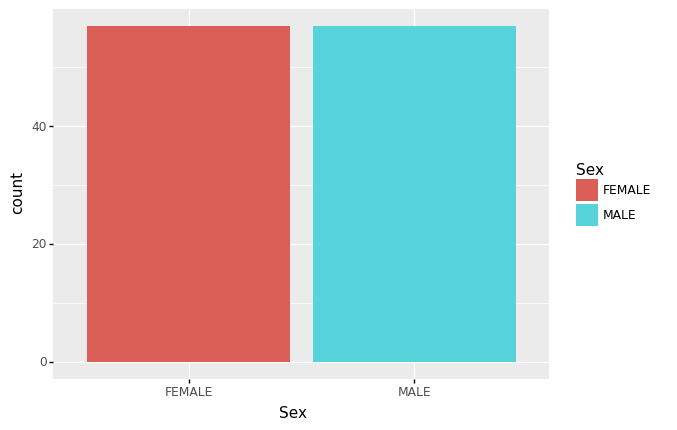

<ggplot: (201210073847)>

In [17]:
ggplot(df) + geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')

`-` 성별 비율은 비슷하다

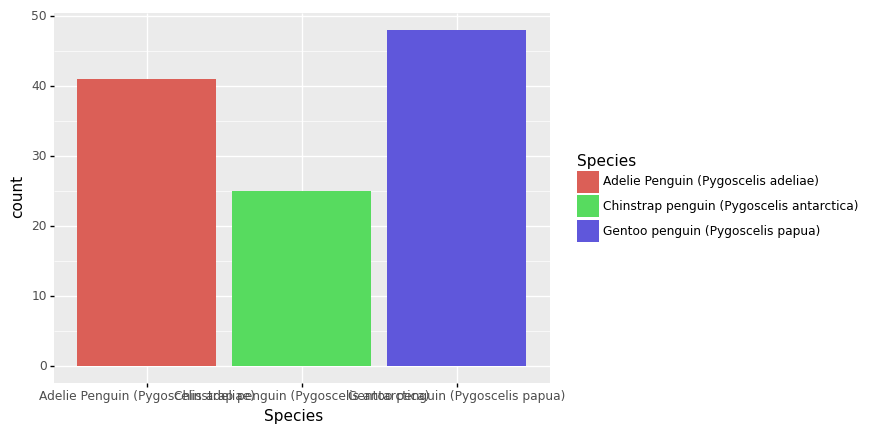

<ggplot: (201221888392)>

In [20]:
ggplot(df) + geom_bar(aes(x = 'Species', fill = 'Species'), stat = 'count')

`-` Gentoo 종이 가장 많다

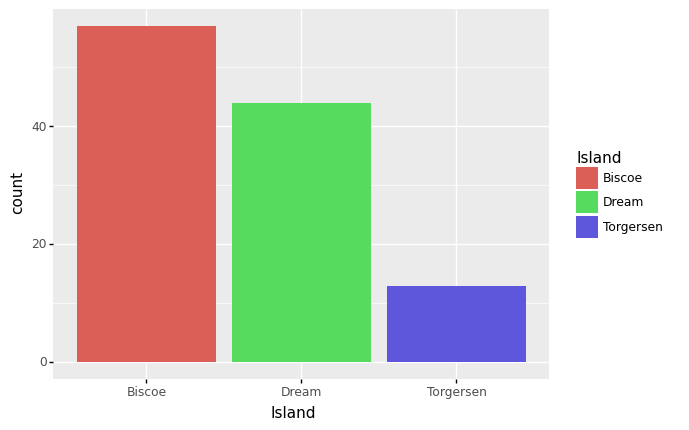

<ggplot: (91351136531)>

In [19]:
ggplot(df) + geom_bar(aes(x = 'Island', fill = 'Island'), stat = 'count')

`-` Biscore가 가장 많다

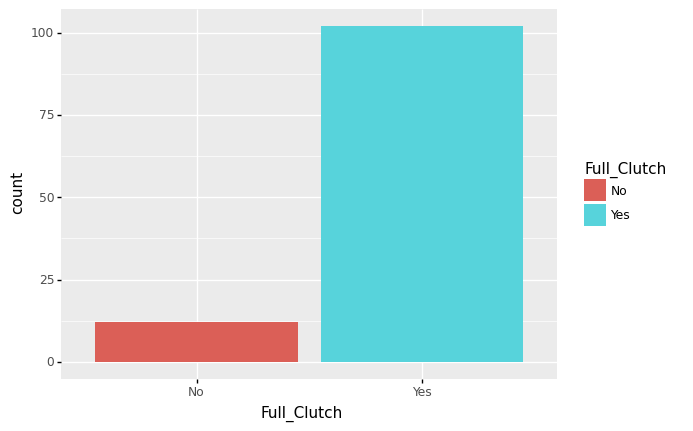

<ggplot: (91351129486)>

In [20]:
ggplot(df) + geom_bar(aes(x = 'Full_Clutch', fill = 'Full_Clutch'), stat = 'count')

`-` 대부분이 Full_Clutch 상태이다

`-` data imbalance가 심하다 (9:1 정도)

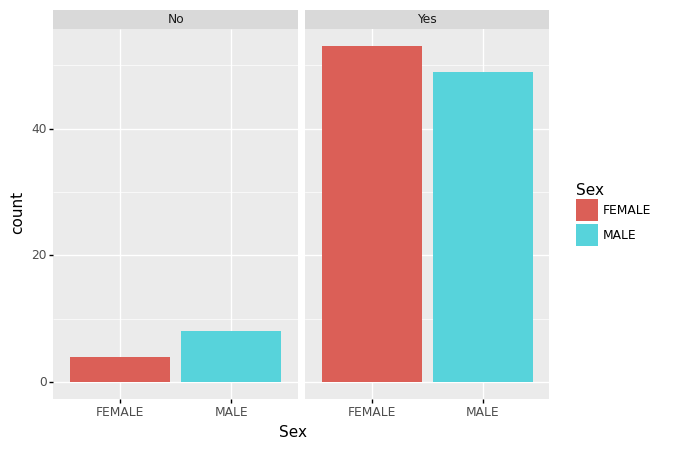

<ggplot: (91350428814)>

In [21]:
ggplot(df)\
+ geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')\
+ facet_wrap('Full_Clutch')

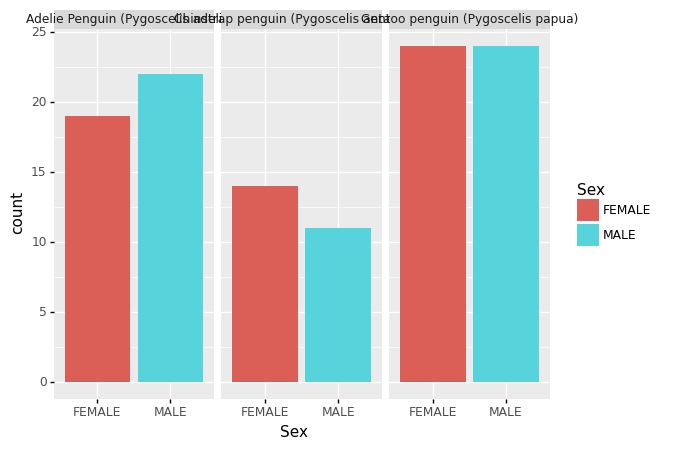

<ggplot: (91337310781)>

In [22]:
ggplot(df)\
+ geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')\
+ facet_wrap('Species') 

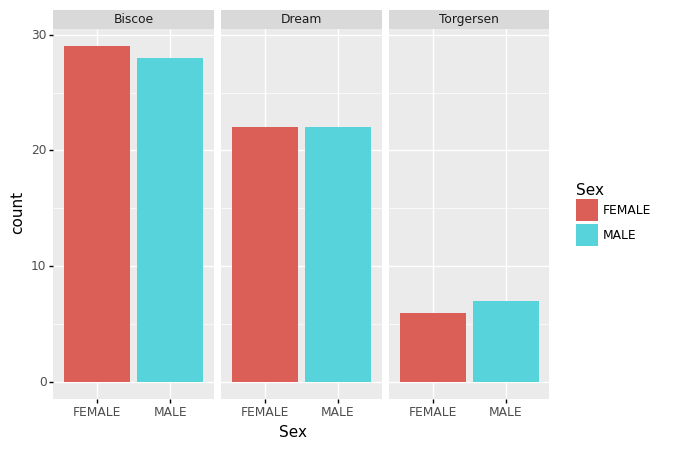

<ggplot: (91351731080)>

In [23]:
ggplot(df)\
+ geom_bar(aes(x = 'Sex', fill = 'Sex'), stat = 'count')\
+ facet_wrap('Island') 

### 양적 변수

In [22]:
corr_df = df.loc[:, numeric_feature] 
corr_matrix = corr_df.corr(method = 'pearson') # 상관관계 행렬

<AxesSubplot:>

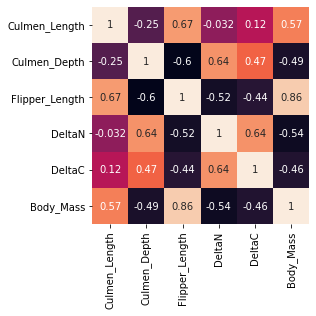

In [52]:
sns.heatmap(corr_matrix, annot = True, cbar = False, square = True)

`-` 일단 몸무게와 다른 양적 변수들 사이의 상관계수는 꽤 높은편이다

`-` 특히 펭귄의 팔(날개) 길이와 몸무게는 강한 양의 상관관계를 띄고있다

`-` 변수들 간의 상관계수가 높은 편이다

`-` pairplot을 그려보니 그룹화 되어있는 것 같았다

`-` 어떤 변수에 의해 그룹화 된 것일까?

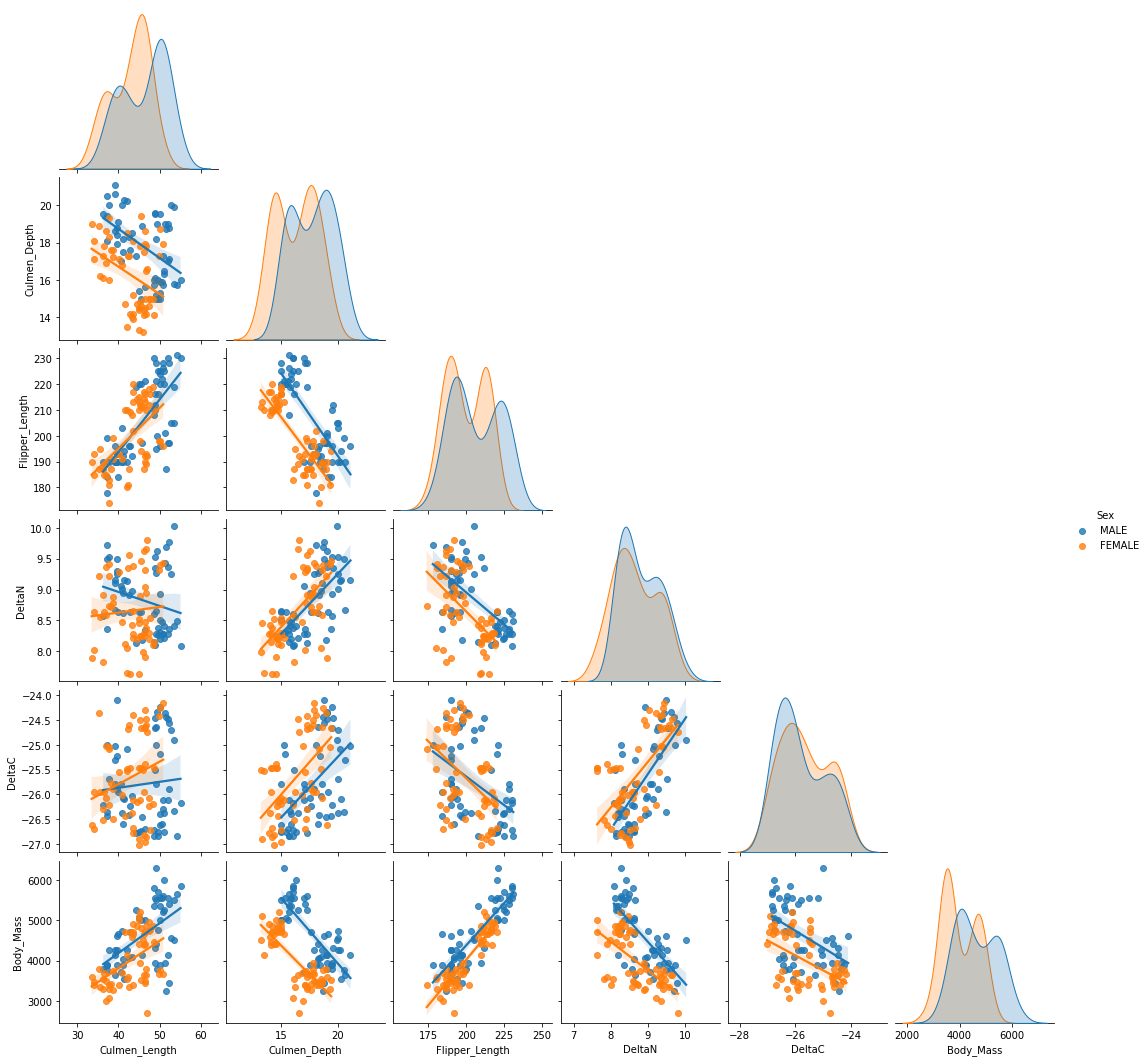

In [61]:
sns.pairplot(df, hue = 'Sex', kind = 'reg', vars = numeric_feature, corner = True)

`-` 수컷이 암컷보다 평균적으로 몸무게가 많이 나간다

`-` 그런데 kde를 보면 쌍봉분포로 보인다

`-` 즉 성별만으로 그룹화된 것을 설명하지 못한다는 것

`-` 종에 따라 나눈 plot을 아래와 같다

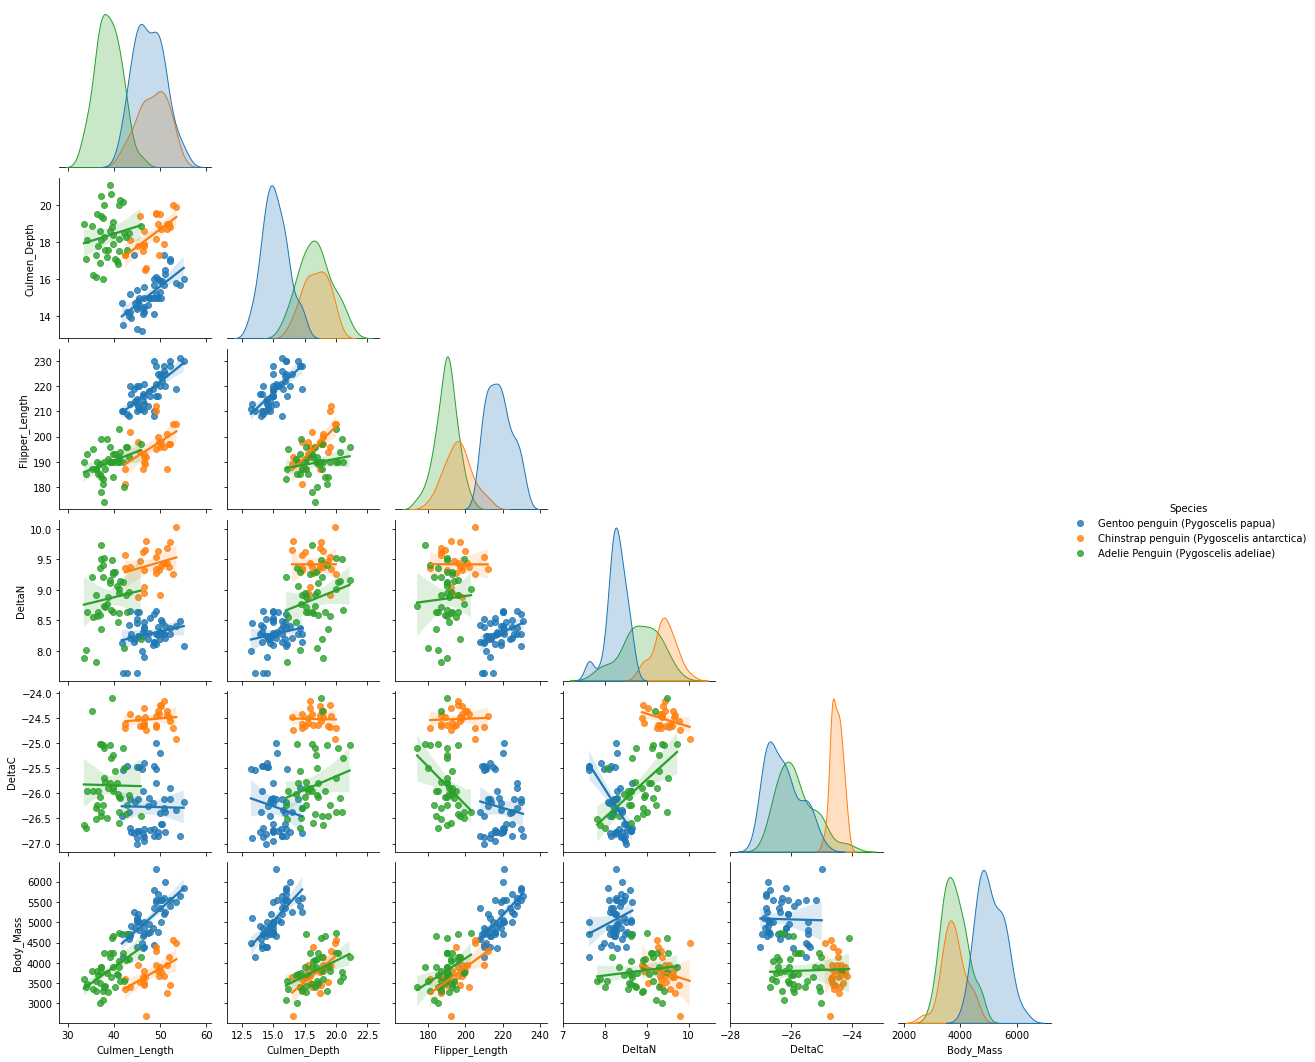

In [62]:
sns.pairplot(df, hue = 'Species', kind = 'reg', vars = numeric_feature, corner = True)

`-` 종에 의해 그룹화되어 있다

`-` Gentoo종이 몸무게가 평균적으로 많이 나간다

`-` 종에 따라 나눠보니 동위원소와 몸무게 사이에 상관관계는 없어보인다(그룹화는 되어있다)

`-` Species에 따라 plot을 그려보니 양적변수들은 종모양으로 보인다

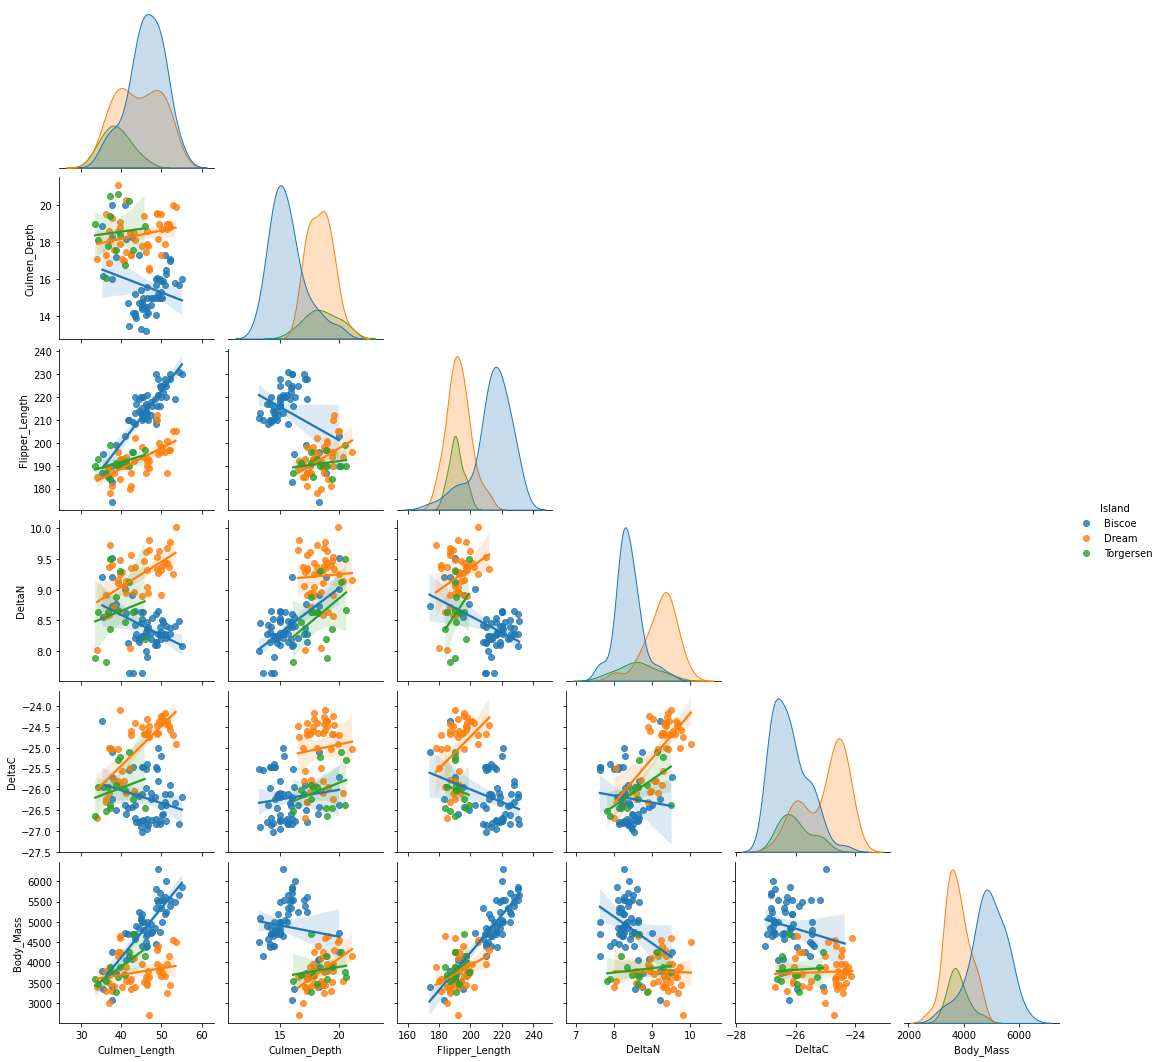

In [63]:
sns.pairplot(df, hue = 'Island', kind = 'reg', vars = numeric_feature, corner = True)

In [79]:
table = df.groupby(['Species', 'Island']).size().reset_index(name = 'cnt').pivot(index = 'Species', columns = 'Island', values = 'cnt')
table

Island,Biscoe,Dream,Torgersen
Species,,,
Adelie Penguin (Pygoscelis adeliae),9.0,19.0,13.0
Chinstrap penguin (Pygoscelis antarctica),NaN,25.0,NaN
Gentoo penguin (Pygoscelis papua),48.0,NaN,NaN


`-` Island(샘플들이 수집된 Palmer Station 근처 섬 이름)에 대해서도 그룹화가 되어있다

`-` 그런데 이는 Island변수 자체적인 이유라기보다는 Species 때문인것 같다 

`-` 시각화해보니 Full_Clutch feature는 무의미해보였다

`-` 양적 변수의 이상치를 탐색할 겸 boxplot을 그려보자

In [68]:
# fig, axs = plt.subplots(2,3, figsize = (14, 10)) ## 주석 풀고 실행 ---> 주석 하고 실행

In [69]:
for i, feature in enumerate(numeric_feature):
    sns.boxplot(data = df, x = feature, ax = axs[i//3][i%3])

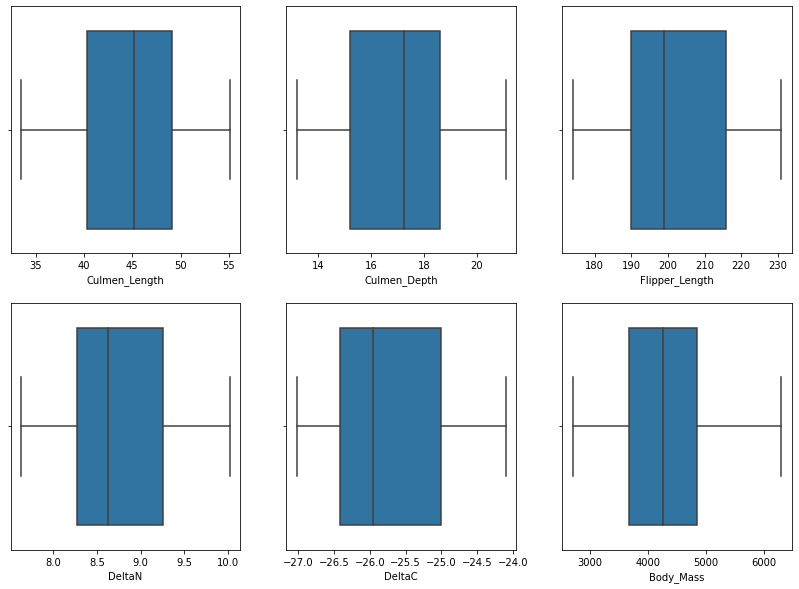

In [70]:
fig

`-` 이상점은 없다

`-` 하지만 Species에 따른 boxplot을 그려본다면?

In [72]:
# fig, axs = plt.subplots(2,3, figsize = (14, 10)) ## 주석 풀고 실행 ---> 주석 하고 실행

In [73]:
for i, feature in enumerate(numeric_feature):
    sns.boxplot(data = df, x = feature, y = 'Species', ax = axs[i//3][i%3])
    if i != 0 and i != 3:
        axs[i//3][i%3].set(yticklabels = [])   
        axs[i//3][i%3].set(ylabel = None)
        axs[i//3][i%3].tick_params(left = False) 

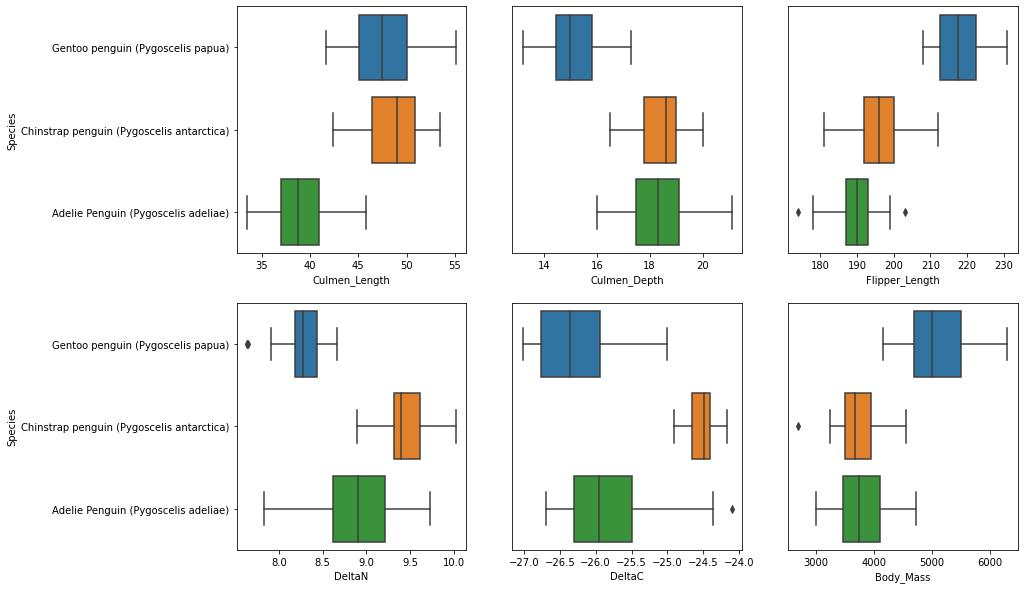

In [74]:
fig

`-` 가장 중요한 Body_Mass 변수에 Species가 Chinstrap 뗑컨인 경우 이상점이 하나 존재한다

In [87]:
df.query('Species == "Chinstrap penguin (Pygoscelis antarctica)"').sort_values('Body_Mass').Body_Mass.iloc[:6]

112    2700
27     3250
77     3350
51     3400
7      3450
31     3450
Name: Body_Mass, dtype: int64

`-` 제일 몸무게가 작은 Chinstrap뗑컨의 몸무게는 2700으로 그 다음으로 작은 뗑컨의 몸무게와 550차이이다

In [20]:
# fig, axs = plt.subplots(2,3, figsize = (14, 10)) ## 주석 풀고 실행 ---> 주석 하고 실행

In [21]:
for i, feature in enumerate(numeric_feature):
    sns.boxplot(data = df, x = feature, y = 'Sex', ax = axs[i//3][i%3])
    if i != 0 and i != 3:
        axs[i//3][i%3].set(yticklabels = [])   
        axs[i//3][i%3].set(ylabel = None)
        axs[i//3][i%3].tick_params(left = False) 

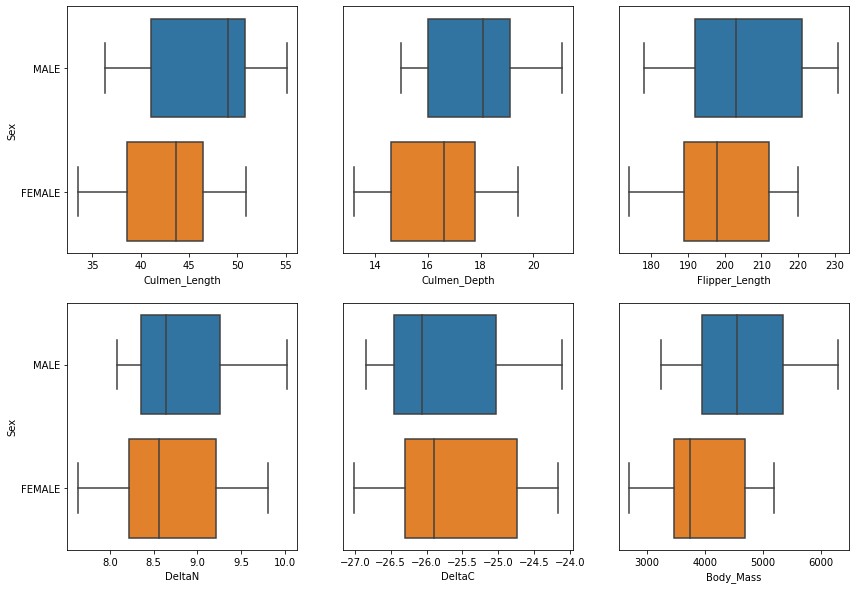

In [22]:
fig

`-` 몸무게에 대해서는 성별의 차이가 존재함

`-` clumen_Length와 Depth에 대해서도 존재함

`-` 나머지에 대해서는 차이가 작다

`-` Island에 대해서도 확인하자

In [76]:
# fig, axs = plt.subplots(2,3, figsize = (14, 10)) ## 주석 풀고 실행 ---> 주석 하고 실행

In [77]:
for i, feature in enumerate(numeric_feature):
    sns.boxplot(data = df, x = feature, y = 'Island', ax = axs[i//3][i%3])
    if i != 0 and i != 3:
        axs[i//3][i%3].set(yticklabels = [])   
        axs[i//3][i%3].set(ylabel = None)
        axs[i//3][i%3].tick_params(left = False) 

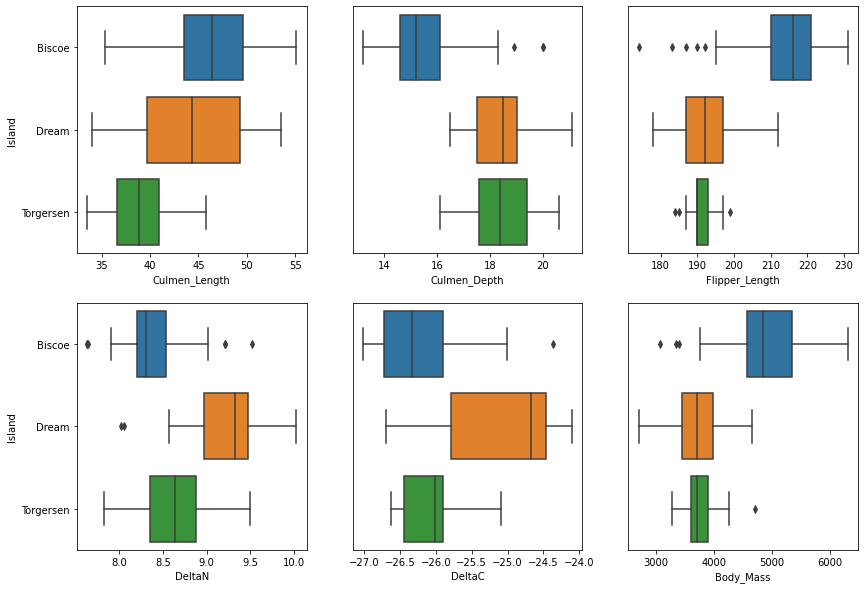

In [78]:
fig

`-` 이걸 보고 Island 대신 Species를 써야겠다고 더욱 다짐함